In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
scdb_full = pd.read_csv('SCDB1901-caseCentered.csv',encoding='ISO 8859-1')
scdb_full.columns

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes'],
      dtype='object')

In [5]:
# new  year column instead of 'dateDecision' column
full_date = scdb_full['dateDecision'].tolist()
year = []
for date in full_date:
    year.append(int(date[-4:]))
scdb_full['year'] = year

In [13]:
#df with pie chart features

scdb = scdb_full[['term', 
                  'chief', 
                  'petitioner', 
                  'respondent', 
                  'jurisdiction', 
                  'adminAction',
                  'caseOrigin',
                  'caseSource',
                  'certReason',
                  'lcDispositionDirection',
                  'issueArea',
                  'majVotes',
                  'minVotes',
                  'decisionDirection',
                   ]]

In [22]:
print(scdb.shape)

scdb.tail()

(8966, 14)


,term,chief,petitioner,respondent,jurisdiction,adminAction,caseOrigin,caseSource,certReason,lcDispositionDirection,issueArea,majVotes,minVotes,decisionDirection
8961,2018,Roberts,100,19.0,1,NaN,95.0,22.0,2.0,1.0,2.0,6,3,2.0
8962,2018,Roberts,228,190.0,1,NaN,115.0,28.0,12.0,2.0,5.0,6,3,1.0
8963,2018,Roberts,126,27.0,1,NaN,82.0,26.0,2.0,1.0,1.0,9,0,1.0
8964,2018,Roberts,138,135.0,1,NaN,20.0,29.0,11.0,1.0,8.0,9,0,2.0
8965,2018,Roberts,7,192.0,1,NaN,69.0,27.0,12.0,2.0,5.0,7,2,1.0


In [15]:
# stat functions
def get_mode(data, column):
    
    return stats.mode(data[column])

def get_other_statistics(data, column):
    
    mean = data[column].mean()
    median = data[column].median()
    stdd = data[column].std()
    var = data[column].var()
    percentiles = np.percentile(data[column], [25, 50, 75])
    
    return {"Mean": mean, "Median": median, "Standard Deviation": stdd, 
            "Variance": var, "Percentiles": percentiles}

In [16]:
# check categorical data

for column in scdb.columns:
    print(column, get_mode(scdb, column), '\n')

term ModeResult(mode=array([1967]), count=array([197])) 

chief ModeResult(mode=array(['Burger'], dtype=object), count=array([2809])) 

petitioner ModeResult(mode=array([28]), count=array([903])) 

respondent ModeResult(mode=array([28.]), count=array([1402])) 

jurisdiction ModeResult(mode=array([1]), count=array([7250])) 

adminAction ModeResult(mode=array([117.]), count=array([663])) 

caseOrigin ModeResult(mode=array([302.]), count=array([1884])) 

caseSource ModeResult(mode=array([300.]), count=array([1683])) 

certReason ModeResult(mode=array([12.]), count=array([3185])) 

lcDispositionDirection ModeResult(mode=array([1.]), count=array([4877])) 

issueArea ModeResult(mode=array([1.]), count=array([2029])) 

majVotes ModeResult(mode=array([9]), count=array([2576])) 

minVotes ModeResult(mode=array([0]), count=array([3413])) 

decisionDirection ModeResult(mode=array([2.]), count=array([4503])) 



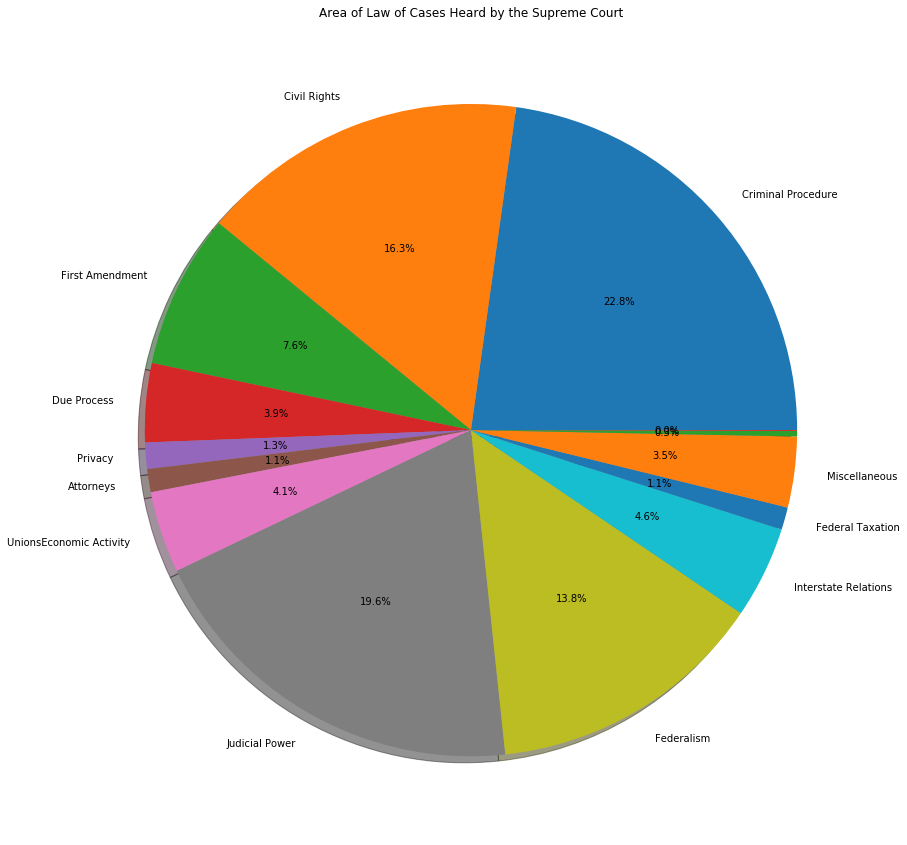

In [21]:
#areas of law cases fall into - Pie chart breakout

list_names = ['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions'
                  'Economic Activity', 'Judicial Power', 'Federalism', 'Interstate Relations', 'Federal Taxation',
                  'Miscellaneous', '', '']
labels = scdb['issueArea'].astype('category').cat.categories.tolist()
counts = scdb['issueArea'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax.pie(sizes, labels=list_names, autopct='%1.1f%%', shadow=True);
plt.title('Area of Law of Cases Heard by the Supreme Court');

In [23]:
# boxplot function

def plot_boxplot(data, column, by_column):
    sns.boxplot(x = column, y = by_column, data = data).set_title('Boxplot of %s by %s' % (column, by_column))
    plt.show()
    plt.close()

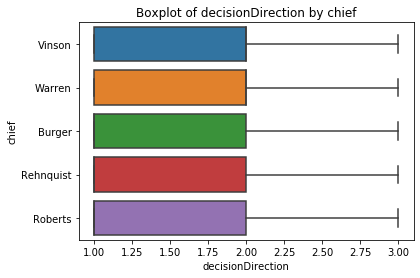

In [25]:
plot_boxplot(scdb, 'decisionDirection', 'chief');